In [41]:
from sklearn.datasets import make_regression, load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

# My ridge model

## 2D

In [2]:
class myRidge:

    def __init__(self, alpha=0.1):
        self.alpha =alpha
        self.c = None
        self.m = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num += ((y_train[i] - y_train.mean())*(X_train[i] - X_train.mean()))
            den += ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()) )

        self.m = num/(den + self.alpha)
        self.c = y_train.mean() - (self.m * X_train.mean())

        print(self.m, self.c)

    def predict(self, X_test):
        return (X_test * self.m) + self.c

## nD

In [3]:
class my_nd_Ridge:

    def __init__(self, alpha=0.1):
        self.alpha =alpha
        self.c = None
        self.m = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        I = np.identity(X_train.shape[1])

        I[0][0] = 0   # official sklearn doing this
        result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train)

        self.intercept_ = result[0]
        self.coef_ = result[1:]


    def predict(self, X_test):
        return (np.dot(X_test, self.coef_) + self.intercept_)

    

## Using Gradient Descent

In [31]:
class my_grad_Ridge:

    def __init__(self, epochs, learning_rate, alpha):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        theta = np.insert(self.coef_, 0, self.intercept_)
        
        X_train = np.insert(X_train, 0, 1, axis=1)

        for i in range(self.epochs):
            theta_der = np.dot(X_train.T, X_train).dot(theta) - np.dot( X_train.T, y_train) + self.alpha * theta
            theta = theta - self.learning_rate * theta_der

        self.coef_ = theta[1:]
        self.intercept_ = theta[0]
            

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_
        

# Datasetes

## 2D

In [5]:
X, y = make_regression(n_samples = 100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=2)

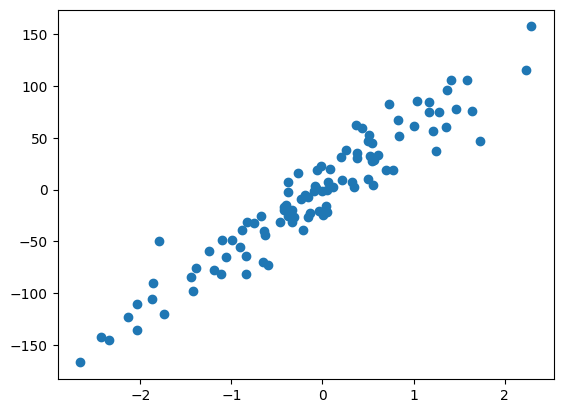

In [6]:
plt.scatter(X, y)

## nD

In [7]:
X_d, y_d =load_diabetes(return_X_y=True)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.2, random_state=4)

# Applying LR

In [9]:
from sklearn.linear_model import LinearRegression,  Ridge, SGDRegressor

In [10]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

[58.11865999]
0.5334392393890024


# Applying Gradient Desccent

In [11]:
gdr = SGDRegressor(penalty='l2', max_iter=500, eta0=0.1, learning_rate='constant', alpha=0.001)

In [12]:
gdr.fit(X_train, y_train)
print(gdr.coef_)
print(gdr.intercept_)

[  49.20401303 -145.69121058  364.94999031  264.98106373   -1.53527729
  -54.89404887 -166.51802975  138.66983135  326.38308487  103.09086756]
[155.37672247]


In [13]:
y_pred_gdr = gdr.predict(X_test)
print('R2 Scrore :' , r2_score(y_test, y_pred_gdr))

R2 Scrore : 0.459779099069922


# Applying myRdg

## 2D

In [14]:
myRg = myRidge(10)
myRg.fit(X, y)

[53.17425635] [0.0205012]


## nD

In [15]:
my_nd_reg = my_nd_Ridge(alpha=0.1)
my_nd_reg.fit(X_train, y_train)

print(my_nd_reg.intercept_)
print(my_nd_reg.coef_)


150.8905342560281
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]


In [16]:
y_pred1 = my_nd_reg.predict(X_test)

print(r2_score(y_test, y_pred1))

0.4693128853309805


## Gradient Descent

In [32]:
my_gdr = my_grad_Ridge(epochs = 500, learning_rate=0.005, alpha=0.001)
my_gdr.fit(X_train, y_train)

print(my_gdr.coef_)
print(my_gdr.intercept_)

[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.86975316713466


In [34]:
y_pred_gdr = my_gdr.predict(X_test)
print(r2_score(y_test, y_pred1))

0.4693128853309805


# Applying Ridge

## 2D

In [17]:
rdg = Ridge(alpha = 10)
rdg.fit(X, y)
print(rdg.coef_)
print(rdg.intercept_)

[53.17425635]
0.020501198988965186


In [18]:
rdg1 = Ridge(alpha = 100)
rdg1.fit(X, y)
print(rdg1.coef_)
print(rdg1.intercept_)

[30.11564938]
-2.371624834224593


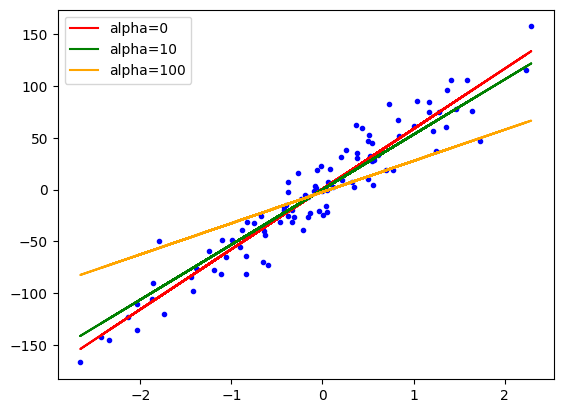

In [19]:
plt.plot(X, y, '.b')
plt.plot(X, lr.predict(X), color='red', label='alpha=0')
plt.plot(X, rdg.predict(X), color='green', label='alpha=10')
plt.plot(X, rdg1.predict(X), color='orange', label='alpha=100')
plt.legend()

## nD

In [20]:
reg = Ridge(alpha = 0.1, solver='cholesky')
reg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [21]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)


0.4693128853309805

In [22]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


## GradientDescent

In [23]:
reg_gd = Ridge(alpha = 0.001, max_iter=500, solver='sparse_cg')
reg_gd.fit(X_train, y_train)
print(reg_gd.coef_)
print(reg_gd.intercept_)

[  34.52192544 -290.84084076  482.40181344  368.0678662  -852.44873179
  501.59160336  180.11115788  270.76333979  759.73534372   37.4913546 ]
151.10198517439466


In [24]:
y_pred_gd = reg.predict(X_test)
r2_score(y_test, y_pred_gd)

0.4693128853309805

# Understandings

## 1. Affect on coef 

In [46]:
data = load_diabetes()

In [47]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [48]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    

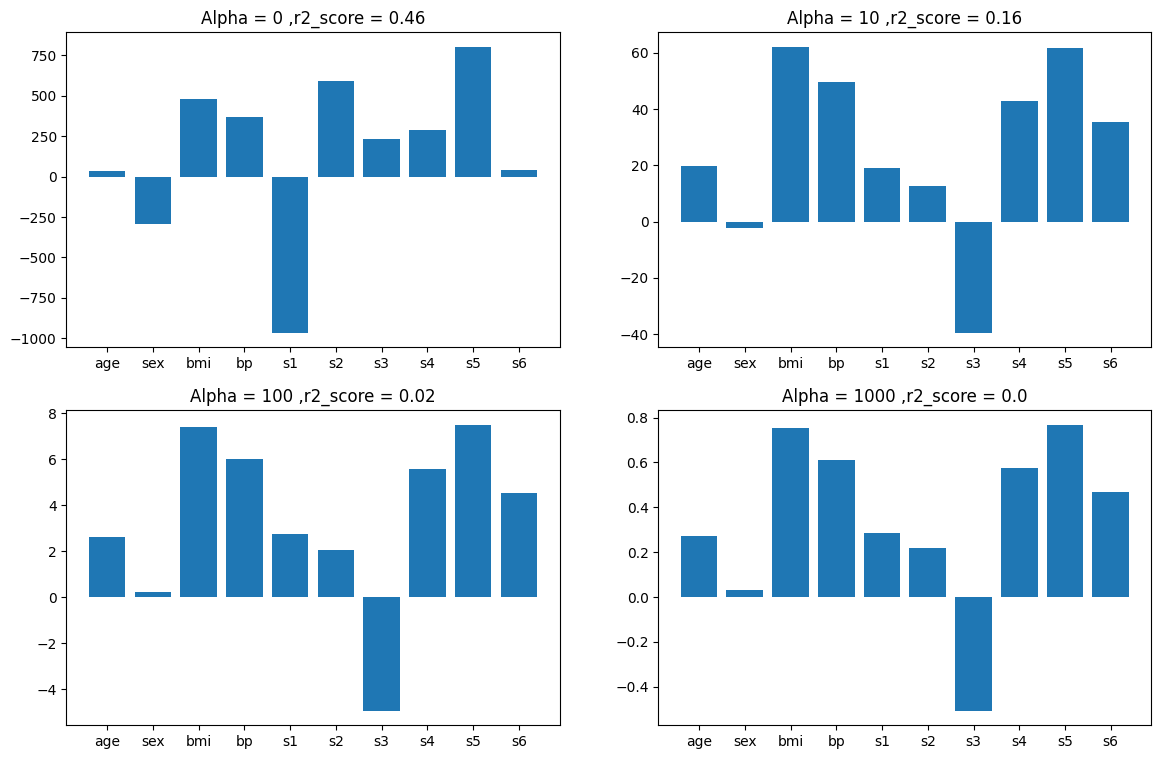

In [49]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

## 2. Higher Coefficients are affected more

In [50]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [51]:
input_array = np.array(coefs)

In [52]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,33.409541,-292.241128,481.080028,369.057161,-966.324639,589.771093,232.598259,288.321647,802.699016,37.813458
0.0001,33.534005,-292.090057,481.233885,368.950642,-953.554577,579.877923,226.710673,286.352989,797.886426,37.773355
0.0010,34.521932,-290.840835,482.401823,368.067875,-852.448721,501.591614,180.111149,270.763353,759.735356,37.491364
0.0100,38.872214,-282.998910,485.047982,362.441022,-419.230221,168.110313,-18.843458,203.843171,594.026885,37.923140
0.1000,44.020634,-241.693300,452.986653,332.044202,-76.336867,-68.521438,-164.988091,149.969081,431.613474,58.518627
1.0000,48.812612,-85.494310,270.226405,201.916048,17.413481,-19.043075,-136.477357,122.265171,247.598463,95.598797
10.0000,19.738169,-2.316503,62.159294,49.546029,18.927164,12.457396,-39.600912,42.819789,61.571158,35.247315
100.0000,2.621511,0.232384,7.390668,5.994492,2.758341,2.061751,-4.949711,5.580060,7.510500,4.547236
1000.0000,0.270749,0.029691,0.754032,0.612825,0.287584,0.217385,-0.507837,0.575190,0.768597,0.468091


In [53]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    

In [54]:
input_array = np.array(coefs).T

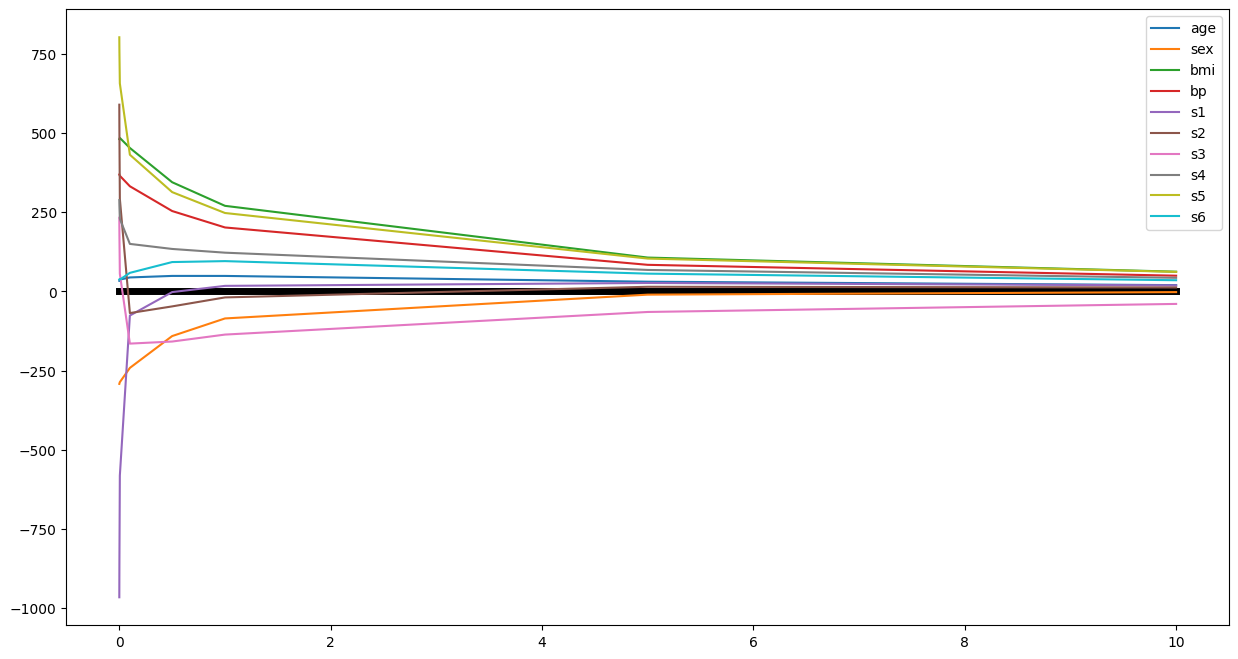

In [55]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

## 3. Impact on Bias and Variance

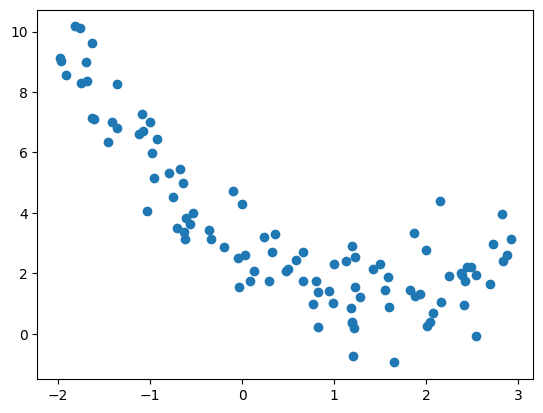

In [62]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()


In [63]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

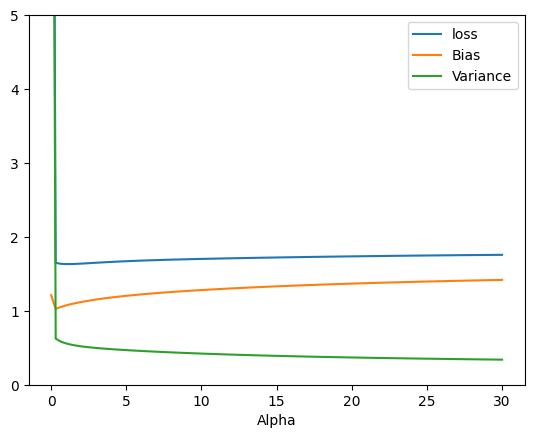

In [65]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

## 4. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


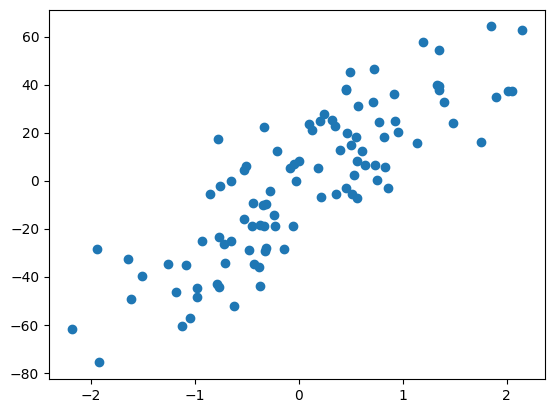

In [71]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [72]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

def predict(m):
    return m*X - 2.29

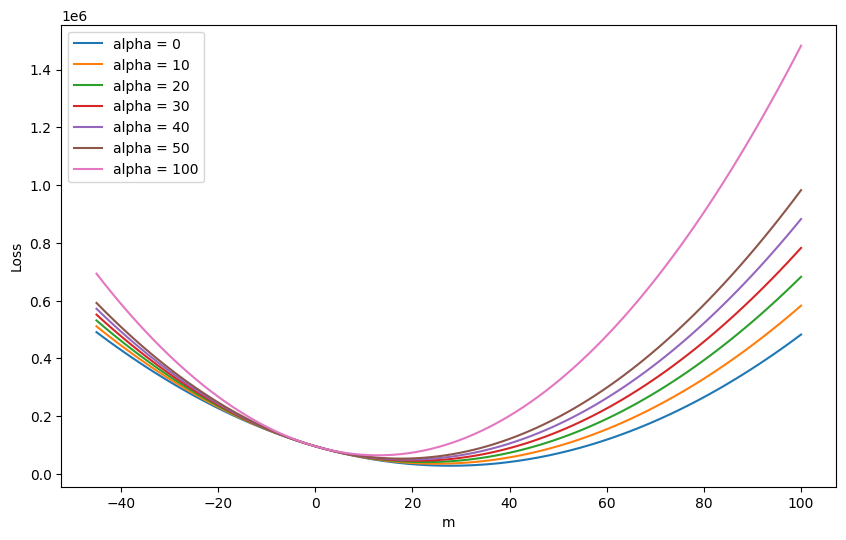

In [76]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(10,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()